In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from model_house import calc_area
from calc_designed_indices import calc_designed_indices

# グラフ描画に用いる関数

In [2]:
DISPLAY = False

In [3]:
def draw_hist_graphs(region, v):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.hist(v[region==r+1], bins=100)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )
    
    plt.show()

In [4]:
def draw_hist_graphs_double(region, v1, v2, label1, label2):
    
    fig = plt.figure(figsize=(14,16))

    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.hist(v1[region==r+1], bins=100, alpha=0.3, color='b', label=label1)
        ax.hist(v2[region==r+1], bins=100, alpha=0.3, color='r', label=label2)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )
    
    plt.legend()
    
    plt.show()

In [5]:
def draw_bar_graphs(region, v, label):
    
    fig = plt.figure(figsize=(14,16))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.bar(range(len(label)), [np.count_nonzero(v[region==r+1] == s) for s in label], tick_label=label)
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v[region==r+1])) )

    plt.show()

In [6]:
def draw_scatter_graphs(region, v1, v2):
    
    fig = plt.figure(figsize=(14,20))
    
    for r in range(8):
        ax = fig.add_subplot(4,2,r+1)
        ax.scatter(v1[region==r+1], v2[region==r+1])
        ax.plot([0,np.max(v1[region==r+1])], [0,np.max(v2[region==r+1])], 'r')
        ax.set_xlabel('detail')
        ax.set_ylabel('simple')
        ax.set_title('region ' +  str(r+1) + '   n = ' + str(len(v1[region==r+1])) )

    
    plt.show()

# ファイルの読み込み

In [7]:
f_envelope = open('envelope_spec.json', 'r')
data_envelope = json.load(f_envelope)
if DISPLAY:
    data_envelope

In [8]:
f_house = open('house_spec.json', 'r')
data_house = json.load(f_house)
if DISPLAY:
    data_house

# 乱数の発生

## 発生する住戸の数

地域別に発生する個数を決定する。

In [9]:
n=[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]

## 地域の区分

In [10]:
region = np.concatenate([np.repeat([r+1], n[r]) for r in range(8)])

## 外皮性能（地域別）

In [11]:
envelope = np.concatenate([
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[0])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n[1])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[2])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n[3])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[4])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[5])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n[6])).T,
    np.exp(np.random.multivariate_normal(
        mean=data_envelope['group4']['mean'], cov=data_envelope['group4']['cov'], size=n[7])).T
], axis=1)

In [12]:
upper_u = envelope[0,:]
wall_u = envelope[1,:]
lower_u = envelope[2,:]
base_psi_outside = envelope[3,:]
base_psi_inside = envelope[4,:]
window_u = envelope[5,:]
window_attachment_u = envelope[6,:]
window_eta = envelope[7,:]
window_attachment_eta = envelope[8,:]

### 上部のU値

In [13]:
if DISPLAY:
    draw_hist_graphs(region, upper_u)

### 外壁のU値

In [14]:
if DISPLAY:
    draw_hist_graphs(region, wall_u)

### 下部のU値

In [15]:
if DISPLAY:
    draw_hist_graphs(region, lower_u)

### 土間床外壁側のψ値

In [16]:
if DISPLAY:
    draw_hist_graphs(region, base_psi_outside)

### 土間床床下側のψ値

In [17]:
if DISPLAY:
    draw_hist_graphs(region, base_psi_inside)

### 窓のU値

In [18]:
if DISPLAY:
    draw_hist_graphs(region, window_u)

### 窓（障子）のU値

In [19]:
if DISPLAY:
    draw_hist_graphs(region, window_attachment_u)

### 窓のη値

In [20]:
if DISPLAY:
    draw_hist_graphs(region, window_eta)

### 窓（障子）のη値

In [21]:
if DISPLAY:
    draw_hist_graphs(region, window_attachment_eta)

## 階数（地域別）

In [22]:
story = np.concatenate([
    np.random.choice(a=data_house['story']['a'], size=n[0], p=data_house['story']['p']['region_1']),
    np.random.choice(a=data_house['story']['a'], size=n[1], p=data_house['story']['p']['region_2']),
    np.random.choice(a=data_house['story']['a'], size=n[2], p=data_house['story']['p']['region_3']),
    np.random.choice(a=data_house['story']['a'], size=n[3], p=data_house['story']['p']['region_4']),
    np.random.choice(a=data_house['story']['a'], size=n[4], p=data_house['story']['p']['region_5']),
    np.random.choice(a=data_house['story']['a'], size=n[5], p=data_house['story']['p']['region_6']),
    np.random.choice(a=data_house['story']['a'], size=n[6], p=data_house['story']['p']['region_7']),
    np.random.choice(a=data_house['story']['a'], size=n[7], p=data_house['story']['p']['region_8']),
])

In [23]:
if DISPLAY:
    draw_bar_graphs(region, story, data_house['story']['a'])

## 床面積

In [24]:
floor_area = np.exp(np.random.normal(
    loc=data_house['floor_area']['log_ave'], scale=data_house['floor_area']['log_std'], size=sum(n)))

In [25]:
if DISPLAY:
    plt.hist(floor_area, bins=100)
    plt.show()

## アスペクト比

In [26]:
aspect_ratio = np.exp(np.random.normal(
    loc=data_house['aspect_ratio']['log_ave'], scale=data_house['aspect_ratio']['log_std'], size=sum(n)))

In [27]:
if DISPLAY:
    plt.hist(aspect_ratio, bins=100)
    plt.show()

## 主たる方位

In [28]:
direction = np.random.choice(
    a=data_house['direction']['a'], size=sum(n), p=data_house['direction']['p'])

In [29]:
if DISPLAY:
    plt.bar(
        x=range(8),
        height=[np.count_nonzero(direction == d) for d in data_house['direction']['a']],
        tick_label=data_house['direction']['a'])
    plt.show()

## 開口部比率

In [30]:
opening_ratio = np.exp(np.random.normal(
    loc=data_house['opening_ratio']['log_ave'], scale=data_house['opening_ratio']['log_std'], size=sum(n)))

In [31]:
if DISPLAY:
    plt.hist(opening_ratio, bins=100)
    plt.show()

# 住宅の作成

## 当該住宅

In [32]:
house = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=floor_area,
    r_open=opening_ratio*0.01,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率14%）

In [33]:
house_s_14 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.14,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率12%）

In [34]:
house_s_12 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.12,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率10%）

In [35]:
house_s_10 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.10,
    floor_ins_type='floor',
    bath_ins_type='base')

## 面積固定住宅（開口率8%）

In [36]:
house_s_08 = np.vectorize(calc_area)(
    house_type='detached',
    a_f_total=90.0,
    r_open=0.08,
    floor_ins_type='floor',
    bath_ins_type='base')

# 指標の計算

In [37]:
u_a, eta_ac = np.vectorize(calc_designed_indices)(
    house, region, direction,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0)

In [38]:
u_a_03, eta_ac_03 = np.vectorize(calc_designed_indices)(
    house, region, direction,
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 1/0.3)

In [39]:
u_a_s_14, eta_ac_s_14 = np.vectorize(calc_designed_indices)(
    house_s_14, region, 'sw',
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0)

In [40]:
u_a_s_12, eta_ac_s_12 = np.vectorize(calc_designed_indices)(
    house_s_12, region, 'sw',
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0)

In [41]:
u_a_s_10, eta_ac_s_10 = np.vectorize(calc_designed_indices)(
    house_s_10, region, 'sw',
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0)

In [42]:
u_a_s_08, eta_ac_s_08 = np.vectorize(calc_designed_indices)(
    house_s_08, region, 'sw',
    upper_u, wall_u, lower_u, base_psi_outside, base_psi_inside,
    window_u, window_attachment_u, window_eta, window_attachment_eta, 20.0)

In [43]:
r_u_a_14 = u_a_s_14 / u_a
r_eta_ac_14 = eta_ac_s_14 / eta_ac

In [44]:
r_u_a_12 = u_a_s_12 / u_a
r_eta_ac_12 = eta_ac_s_12 / eta_ac

In [45]:
r_u_a_10 = u_a_s_10 / u_a
r_eta_ac_10 = eta_ac_s_10 / eta_ac

In [46]:
r_u_a_08 = u_a_s_08 / u_a
r_eta_ac_08 = eta_ac_s_08 / eta_ac

# 比較

## 開口率14%の場合の散布図とヒストグラム

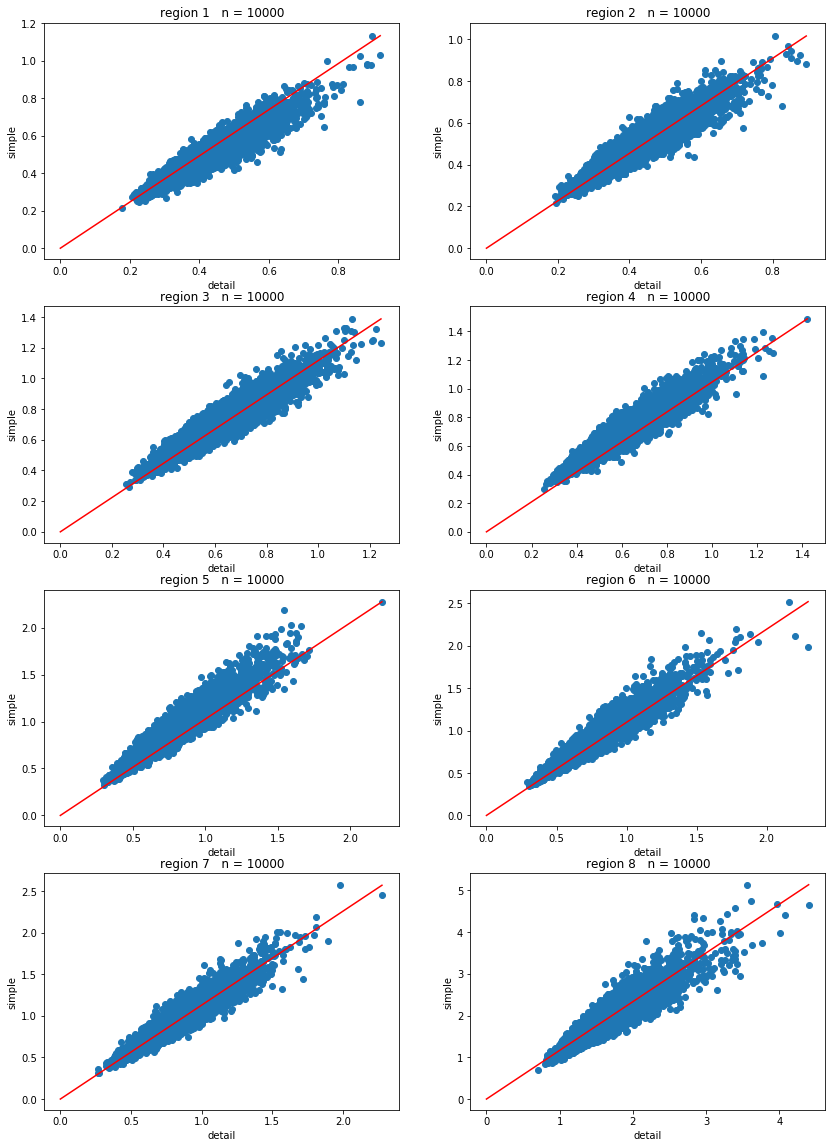

In [47]:
draw_scatter_graphs(region, u_a, u_a_s_14)

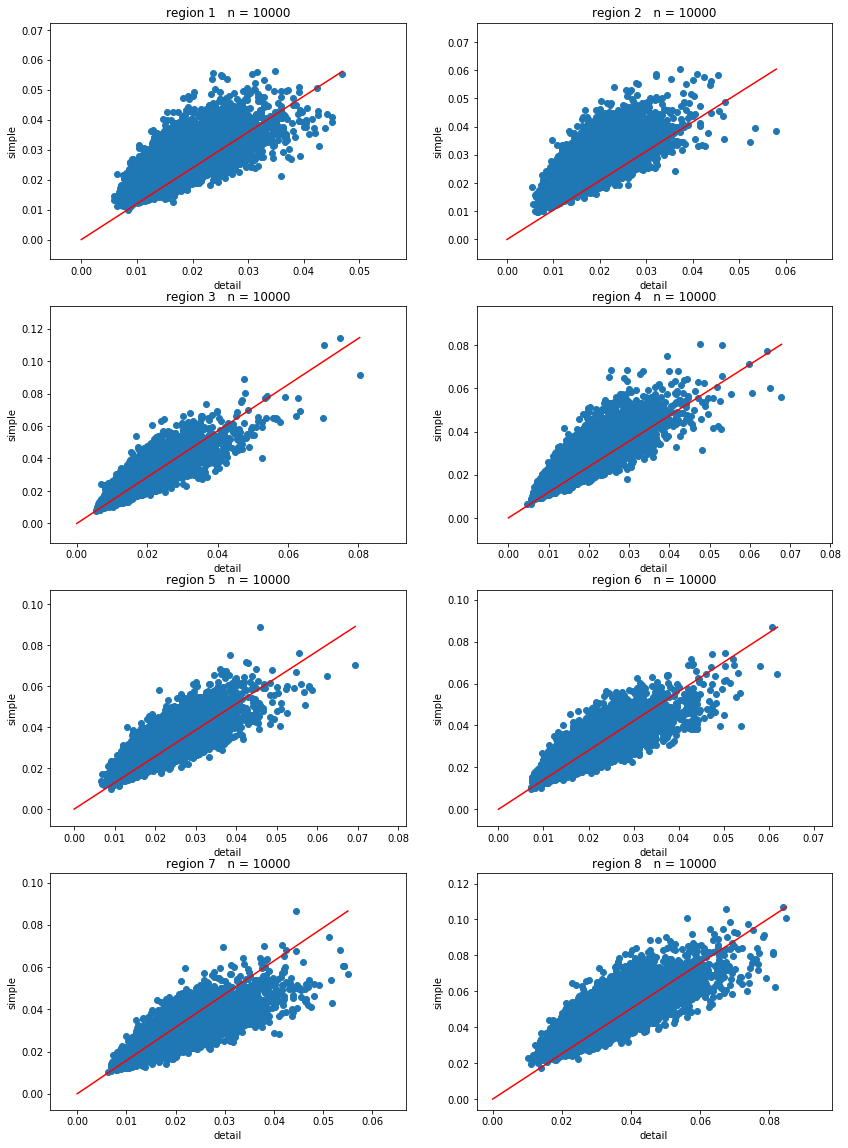

In [48]:
draw_scatter_graphs(region, eta_ac, eta_ac_s_14)

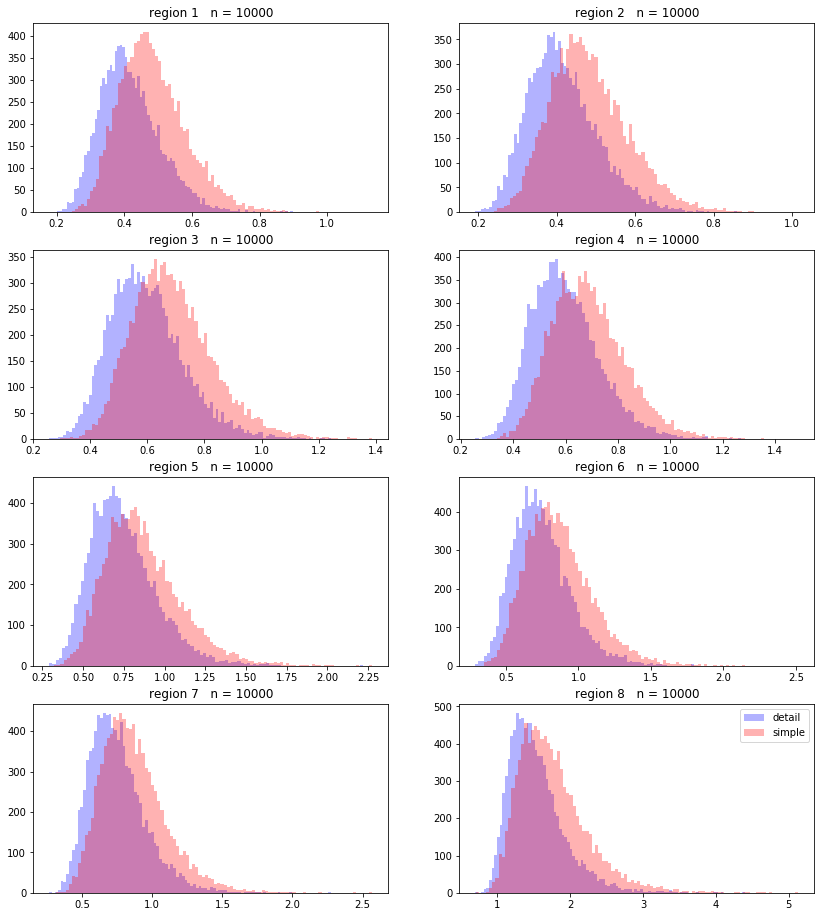

In [49]:
draw_hist_graphs_double(region, u_a, u_a_s_14, 'detail', 'simple')

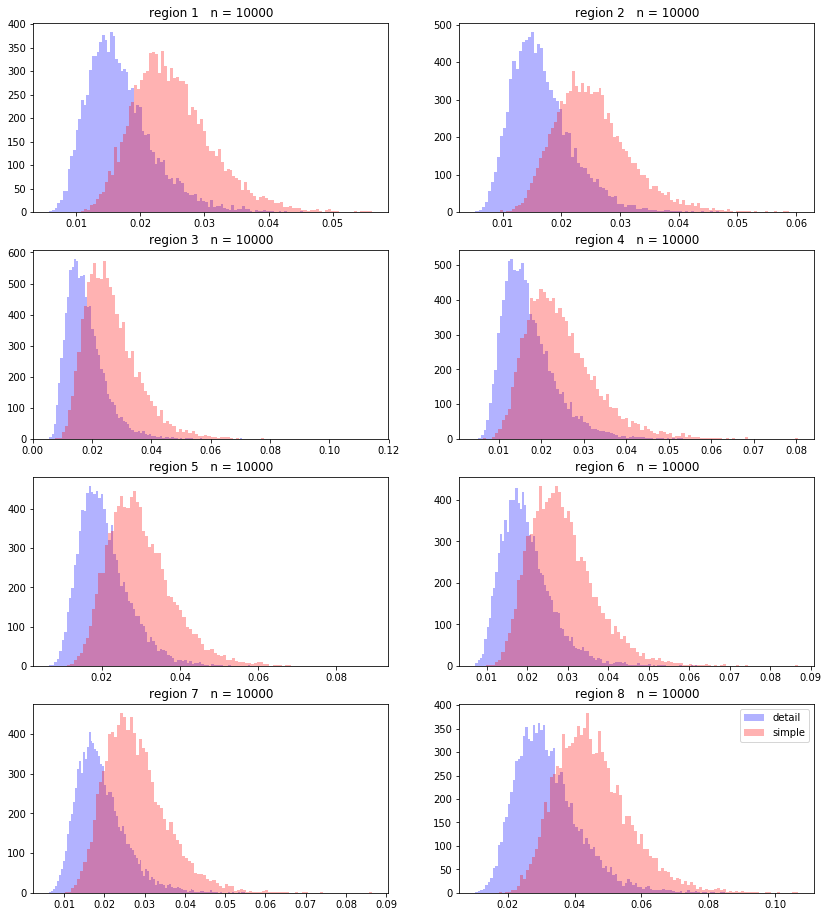

In [50]:
draw_hist_graphs_double(region, eta_ac, eta_ac_s_14, 'detail', 'simple')

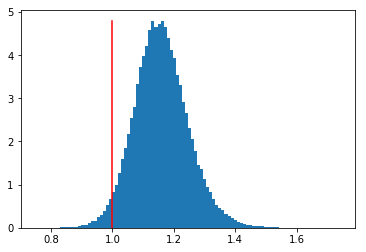

In [51]:
d=plt.hist(r_u_a_14, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

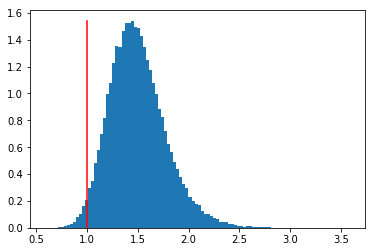

In [52]:
d=plt.hist(r_eta_ac_14, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [53]:
np.count_nonzero(r_u_a_14 < 1.0) / np.count_nonzero(r_u_a_14)

0.02905

In [54]:
np.count_nonzero(r_eta_ac_14 < 1.0) / np.count_nonzero(r_eta_ac_14)

0.0179

## 開口率12%の場合の散布図とヒストグラム

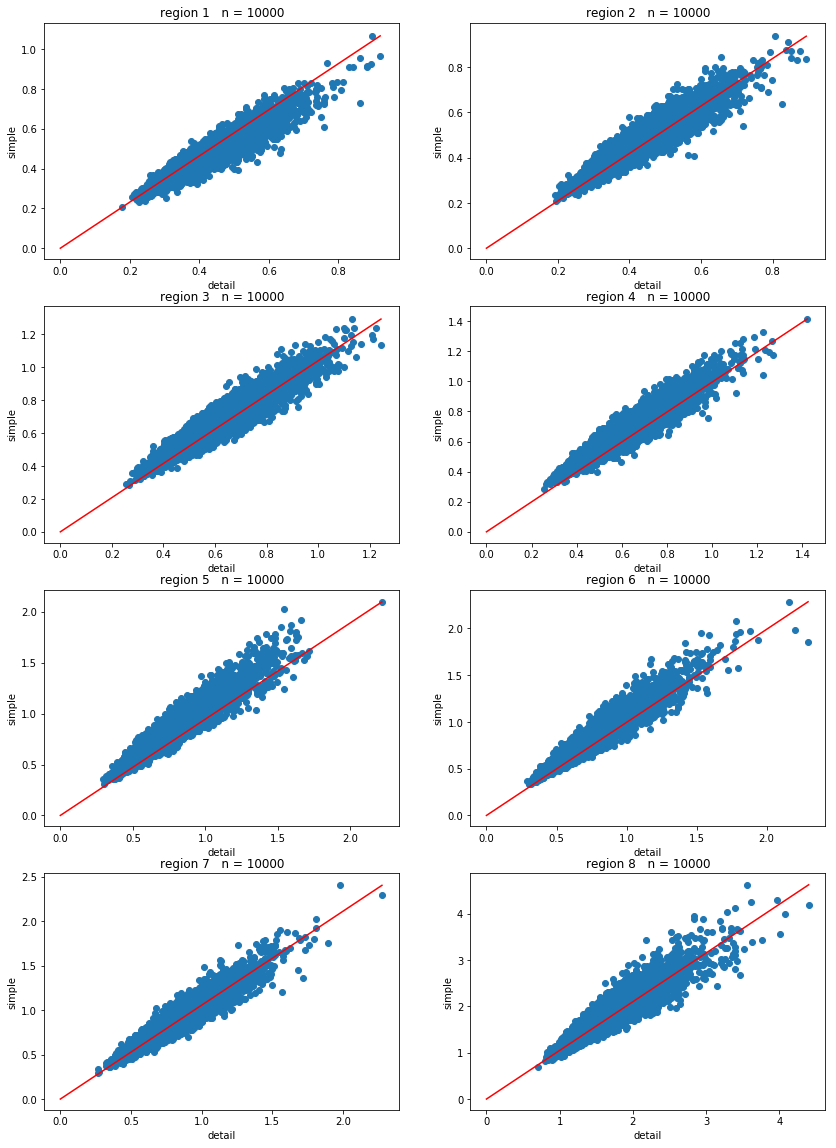

In [55]:
draw_scatter_graphs(region, u_a, u_a_s_12)

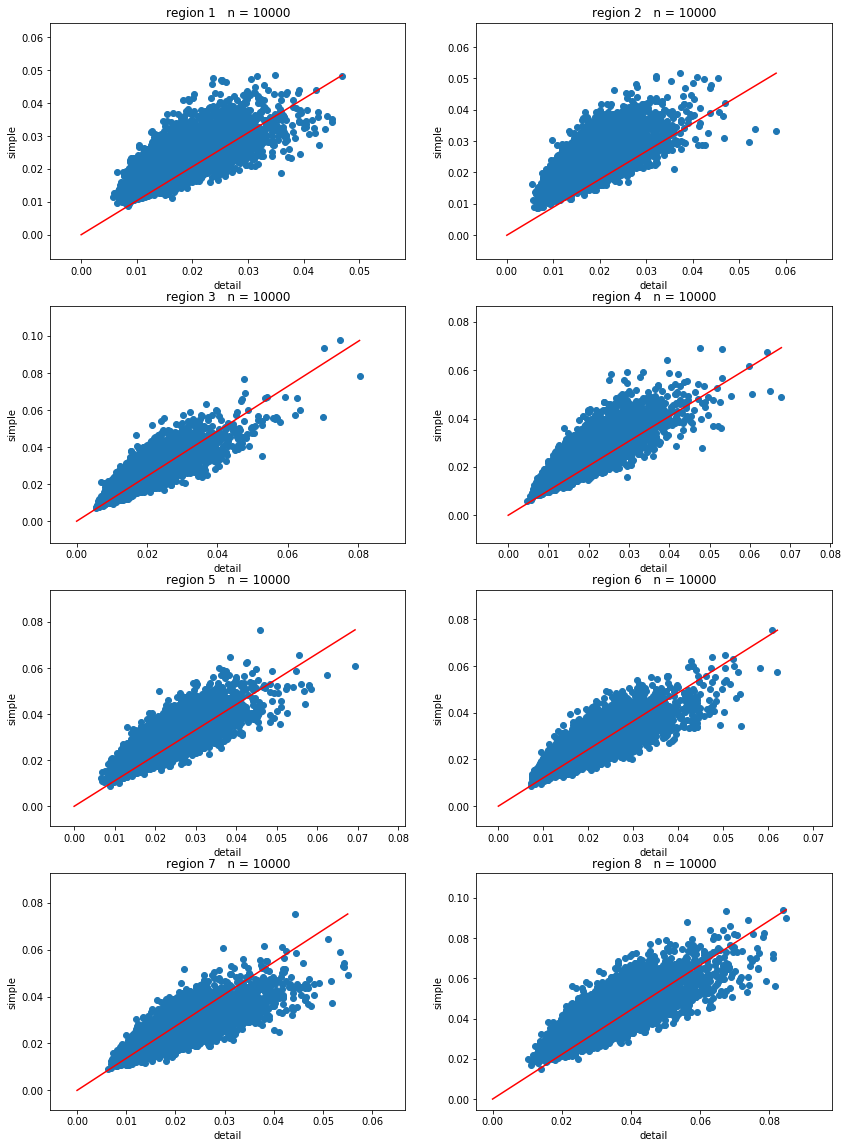

In [56]:
draw_scatter_graphs(region, eta_ac, eta_ac_s_12)

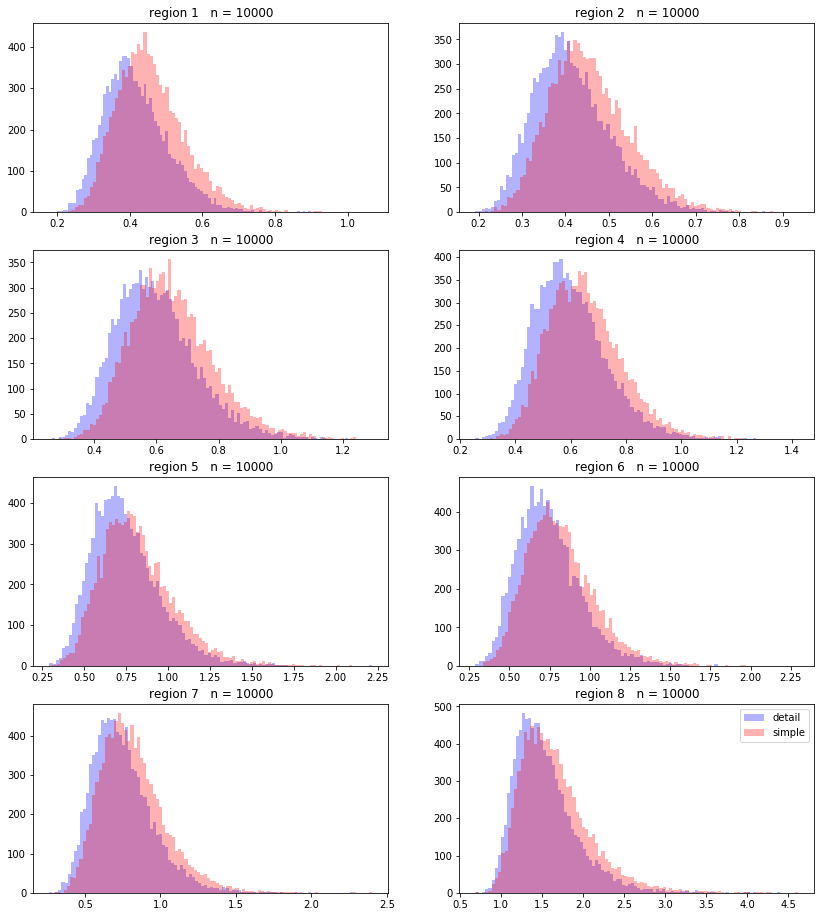

In [57]:
draw_hist_graphs_double(region, u_a, u_a_s_12, 'detail', 'simple')

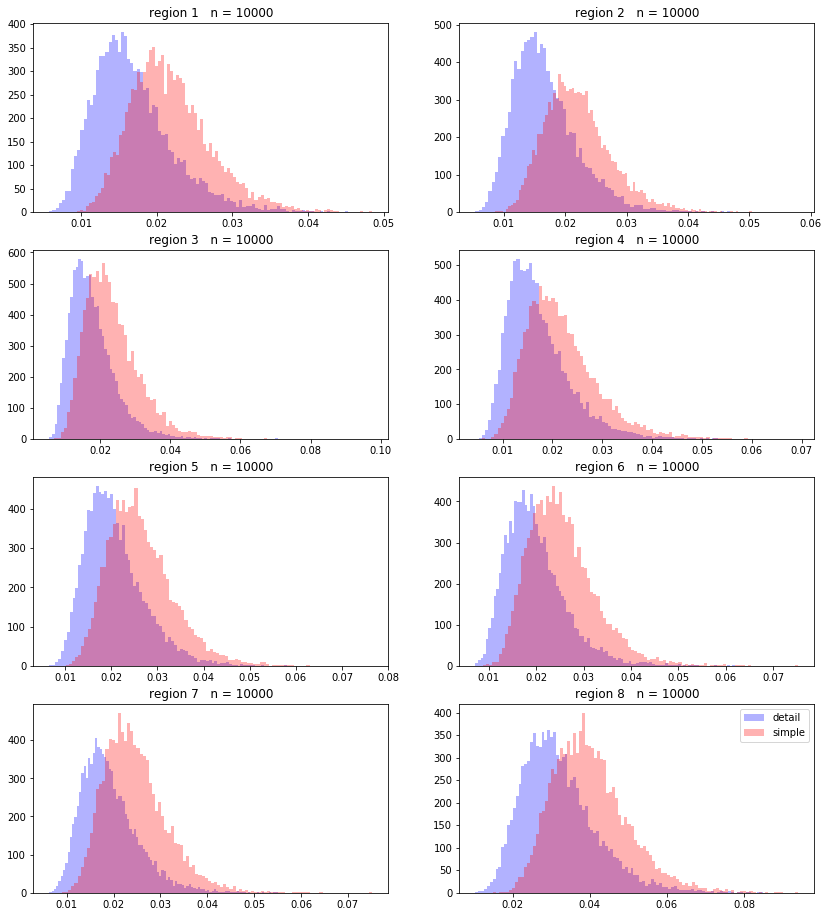

In [58]:
draw_hist_graphs_double(region, eta_ac, eta_ac_s_12, 'detail', 'simple')

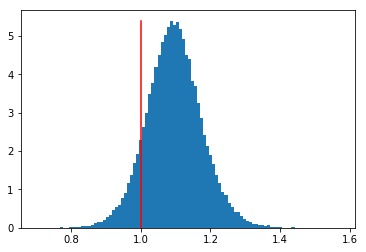

In [59]:
d=plt.hist(r_u_a_12, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

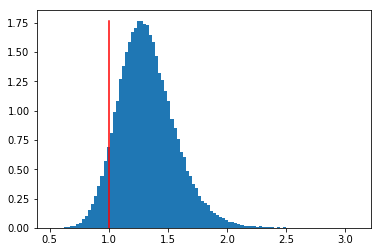

In [60]:
d=plt.hist(r_eta_ac_12, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [61]:
np.count_nonzero(r_u_a_12 < 1.0) / np.count_nonzero(r_u_a_12)

0.1053125

In [62]:
np.count_nonzero(r_eta_ac_12 < 1.0) / np.count_nonzero(r_eta_ac_12)

0.0715

## 開口率10%の場合の散布図とヒストグラム

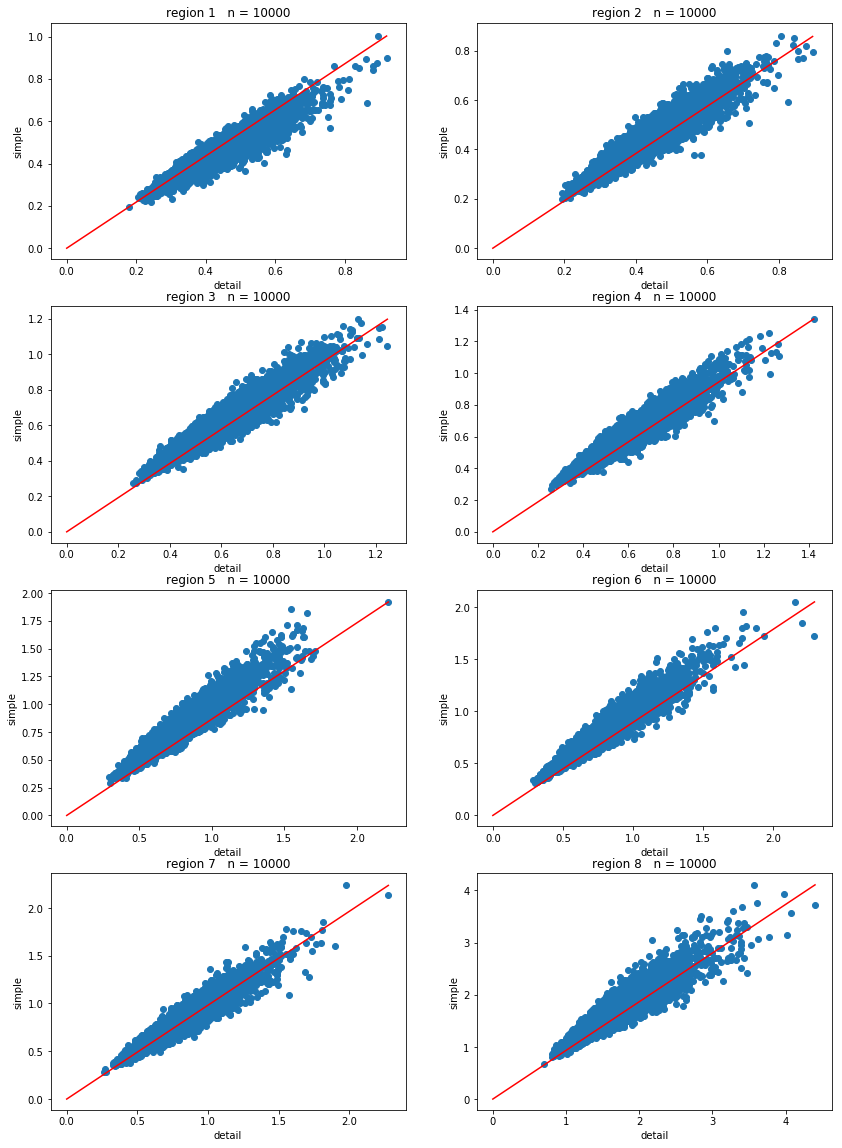

In [63]:
draw_scatter_graphs(region, u_a, u_a_s_10)

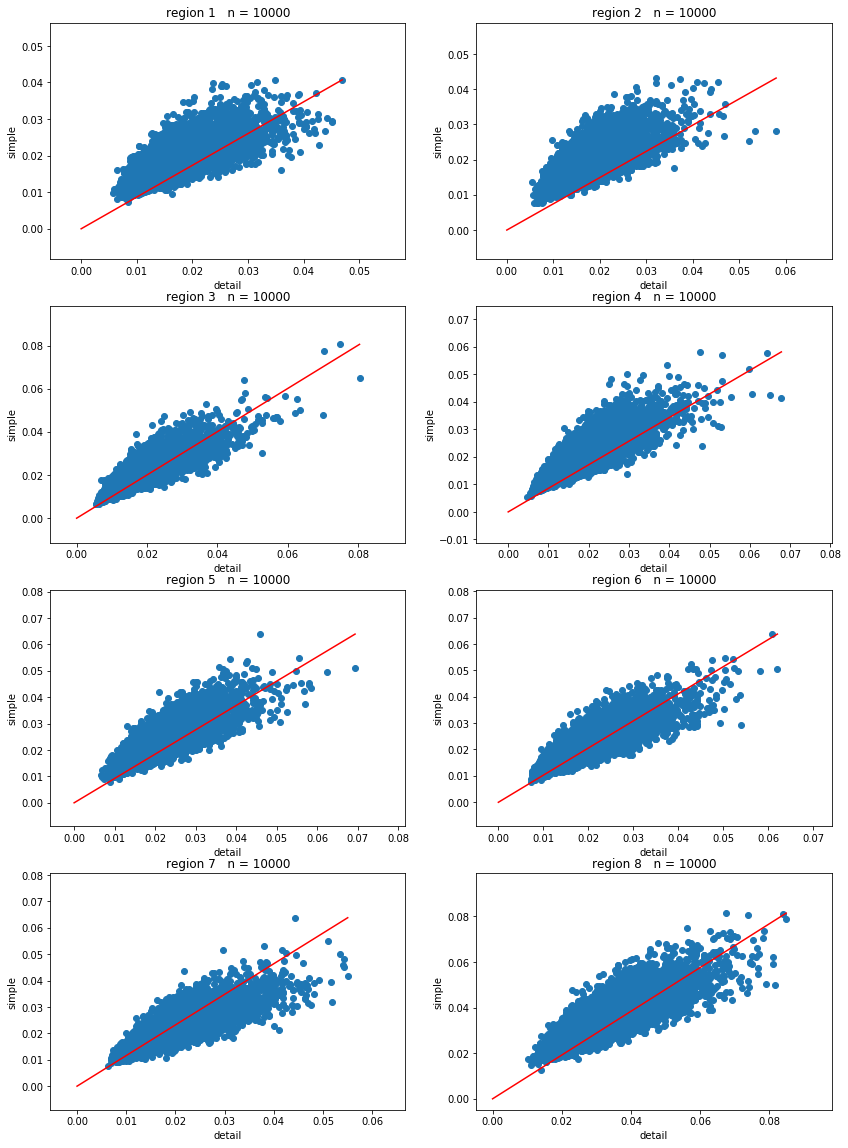

In [64]:
draw_scatter_graphs(region, eta_ac, eta_ac_s_10)

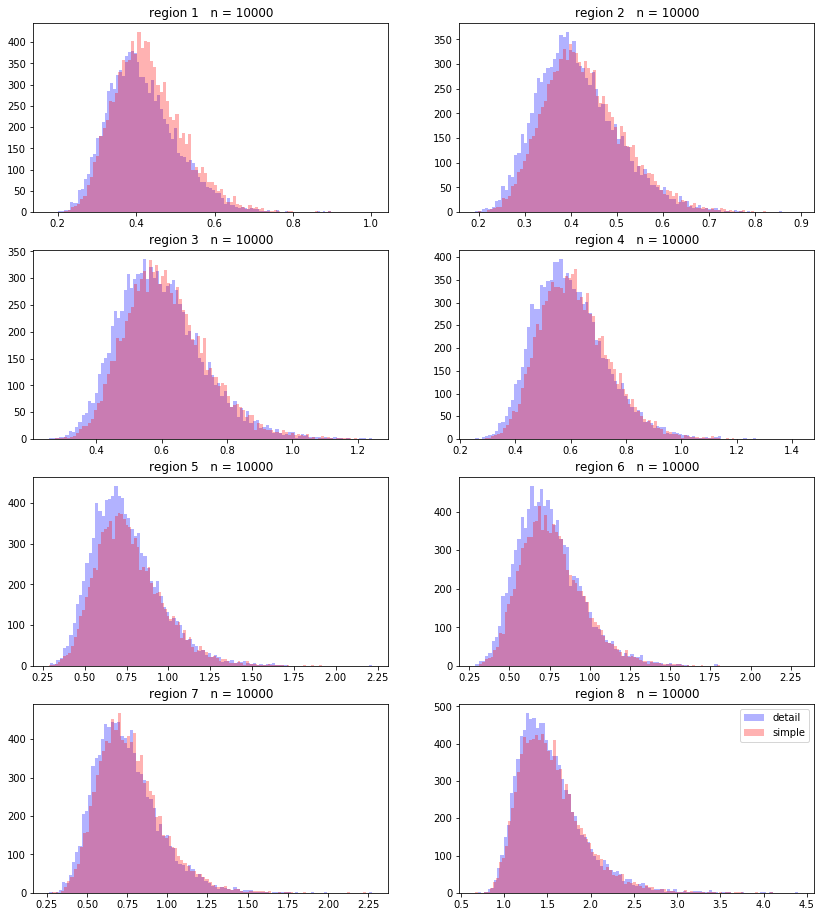

In [65]:
draw_hist_graphs_double(region, u_a, u_a_s_10, 'detail', 'simple')

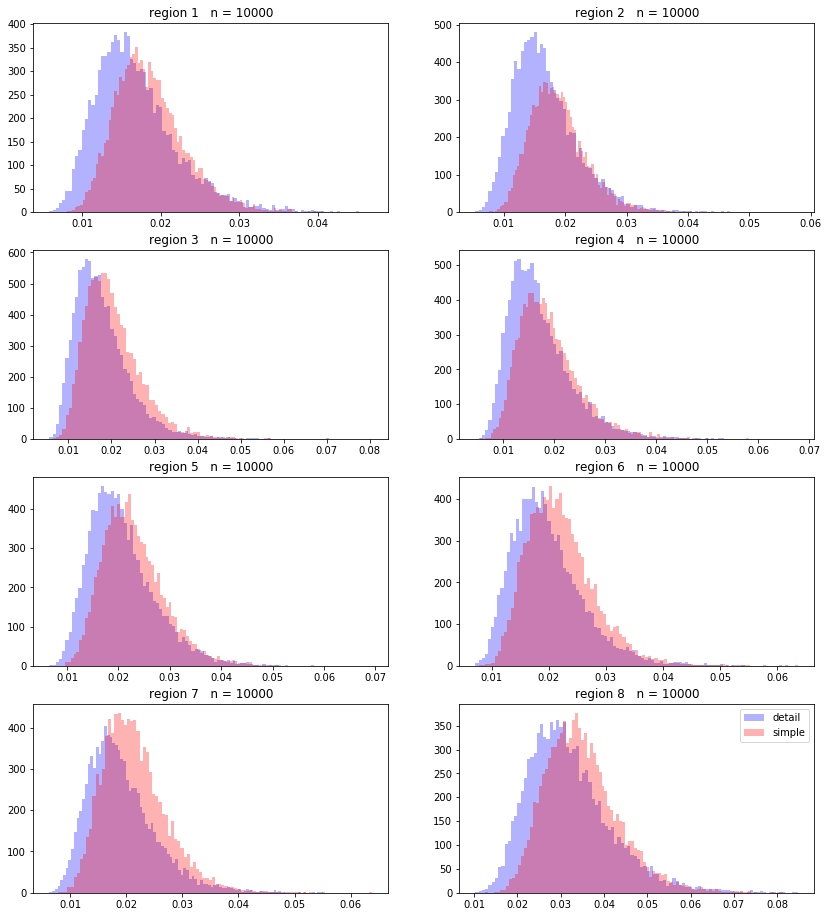

In [66]:
draw_hist_graphs_double(region, eta_ac, eta_ac_s_10, 'detail', 'simple')

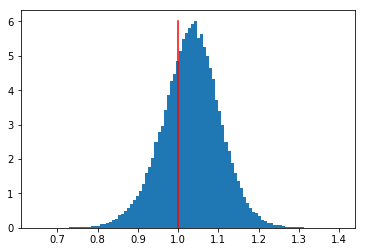

In [67]:
d=plt.hist(r_u_a_10, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

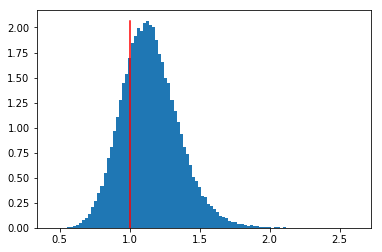

In [68]:
d=plt.hist(r_eta_ac_10, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [69]:
np.count_nonzero(r_u_a_10 < 1.0) / np.count_nonzero(r_u_a_10)

0.3118375

In [70]:
np.count_nonzero(r_eta_ac_10 < 1.0) / np.count_nonzero(r_eta_ac_10)

0.2397625

## 開口率8%の場合の散布図とヒストグラム

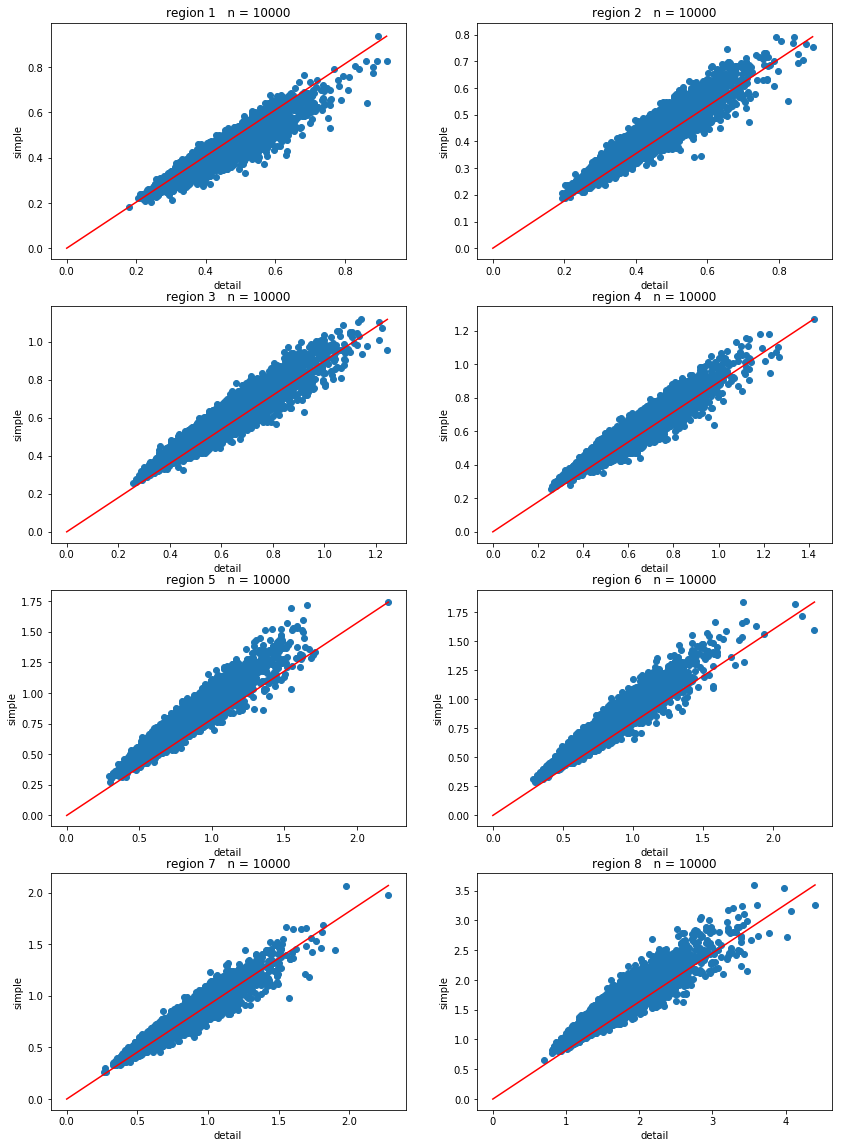

In [71]:
draw_scatter_graphs(region, u_a, u_a_s_08)

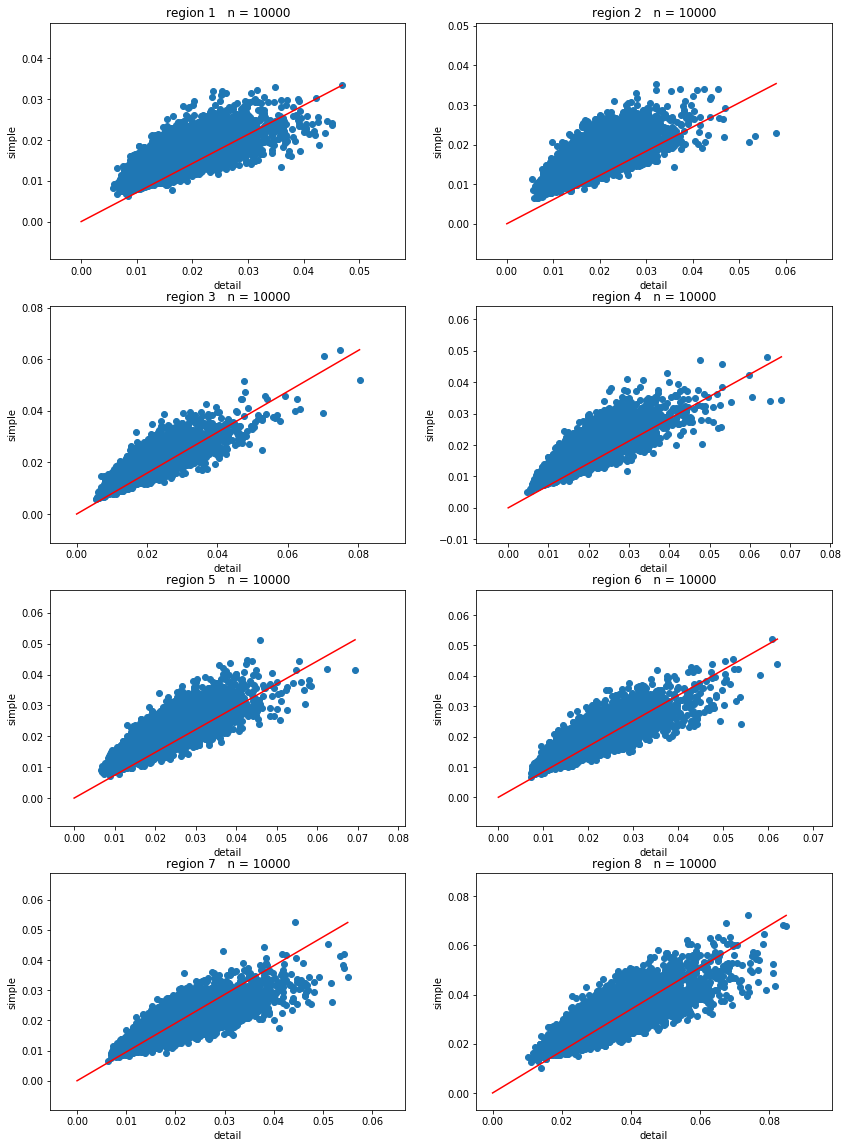

In [72]:
draw_scatter_graphs(region, eta_ac, eta_ac_s_08)

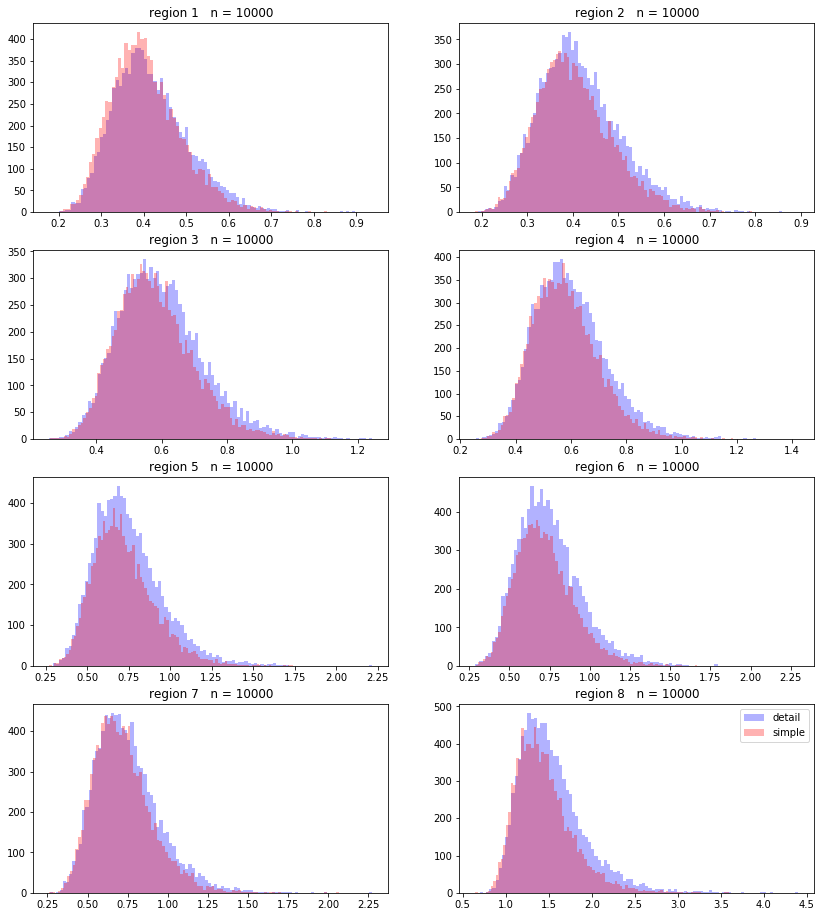

In [73]:
draw_hist_graphs_double(region, u_a, u_a_s_08, 'detail', 'simple')

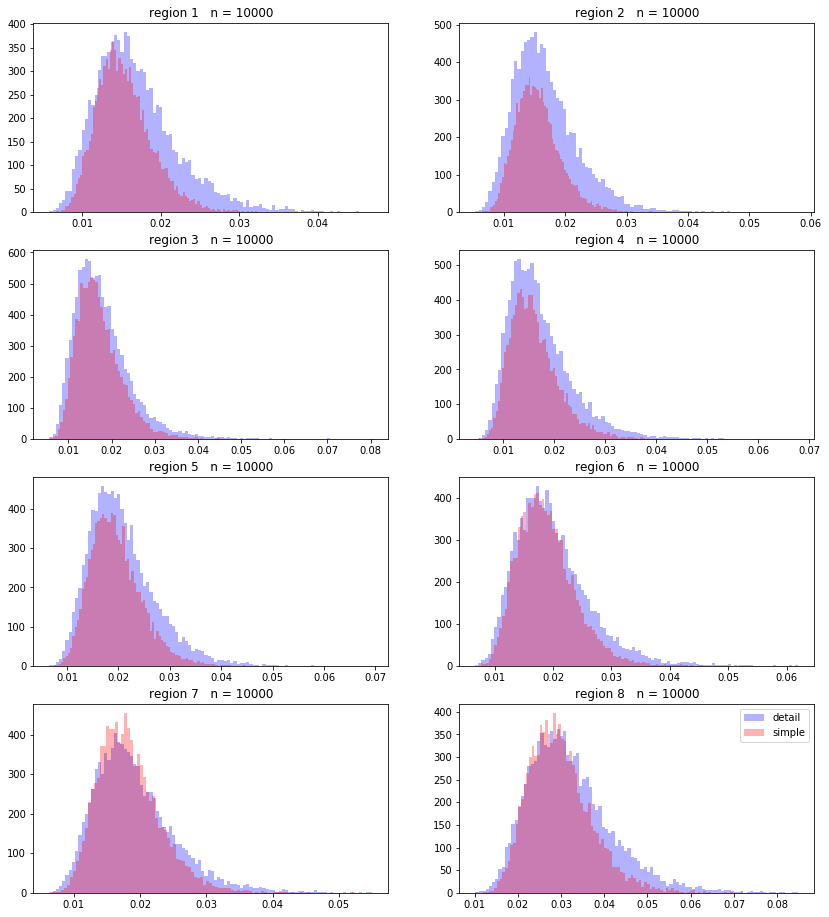

In [74]:
draw_hist_graphs_double(region, eta_ac, eta_ac_s_08, 'detail', 'simple')

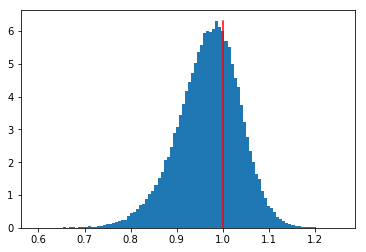

In [75]:
d=plt.hist(r_u_a_08, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

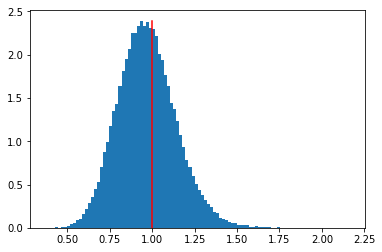

In [76]:
d=plt.hist(r_eta_ac_08, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

余裕率（簡易法の方が性能が良くでてしまう割合）

In [77]:
np.count_nonzero(r_u_a_08 < 1.0) / np.count_nonzero(r_u_a_08)

0.6661625

In [78]:
np.count_nonzero(r_eta_ac_08 < 1.0) / np.count_nonzero(r_eta_ac_08)

0.5875

# 床面積に対する開口部面積

In [79]:
a_window = np.array([h['a_evp_window_total'] for h in house])

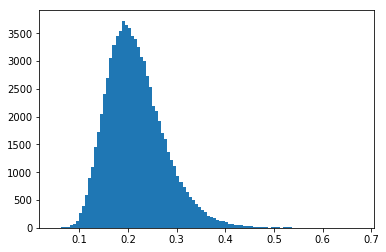

In [80]:
plt.hist(a_window/floor_area, bins=100)
plt.show()

In [81]:
u_a_limit = u_a[a_window/floor_area<0.3]
eta_ac_limit = eta_ac[a_window/floor_area<0.3]
u_a_s_10_limit = u_a_s_10[a_window/floor_area<0.3]
eta_ac_s_10_limit = eta_ac_s_10[a_window/floor_area<0.3]
r_u_a_10_limit = u_a_s_10_limit / u_a_limit
r_eta_ac_10_limit = eta_ac_s_10_limit / eta_ac_limit

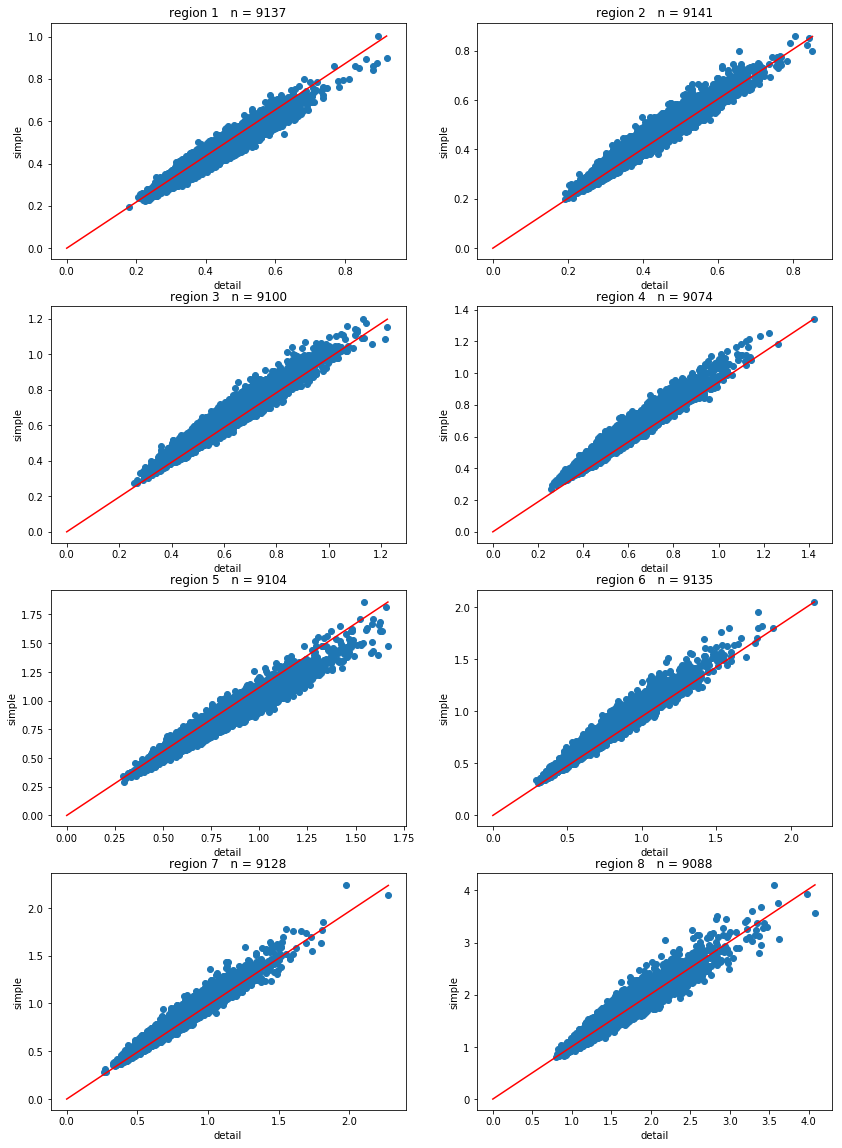

In [82]:
draw_scatter_graphs(region[a_window/floor_area<0.3], u_a_limit, u_a_s_10_limit)

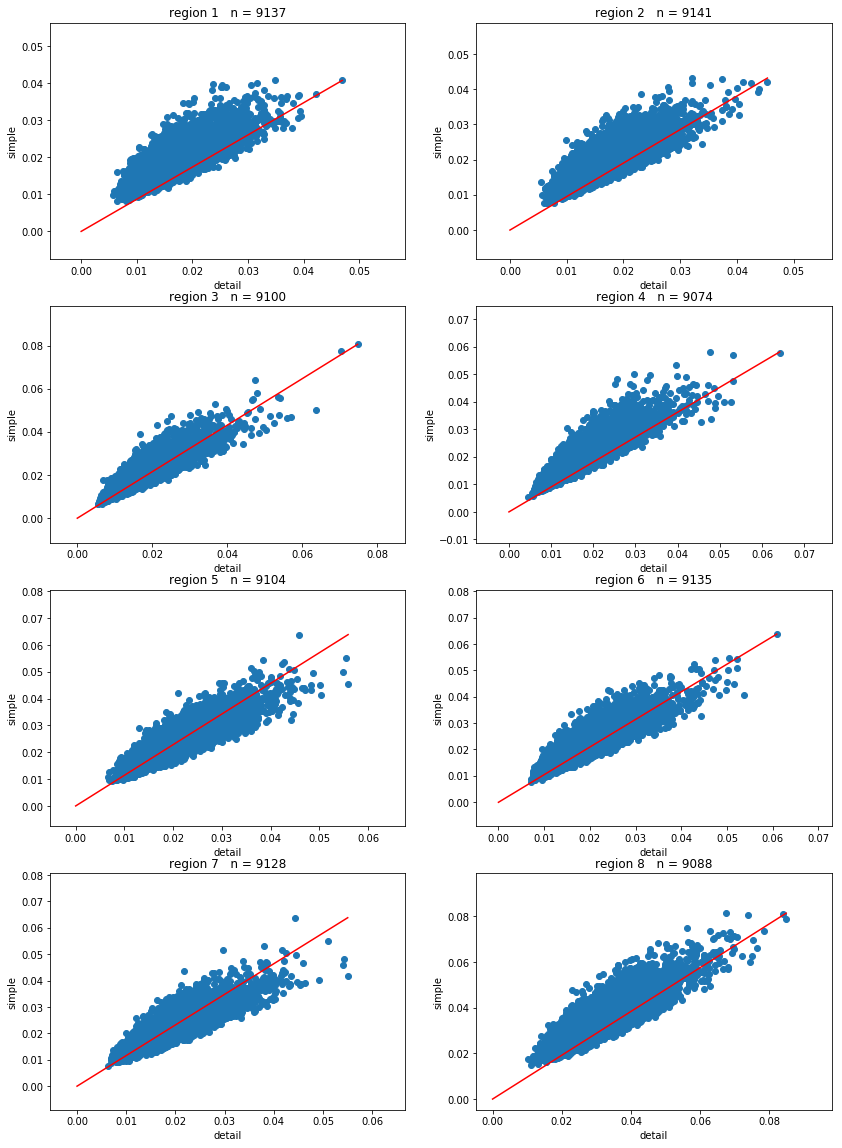

In [83]:
draw_scatter_graphs(region[a_window/floor_area<0.3], eta_ac_limit, eta_ac_s_10_limit)

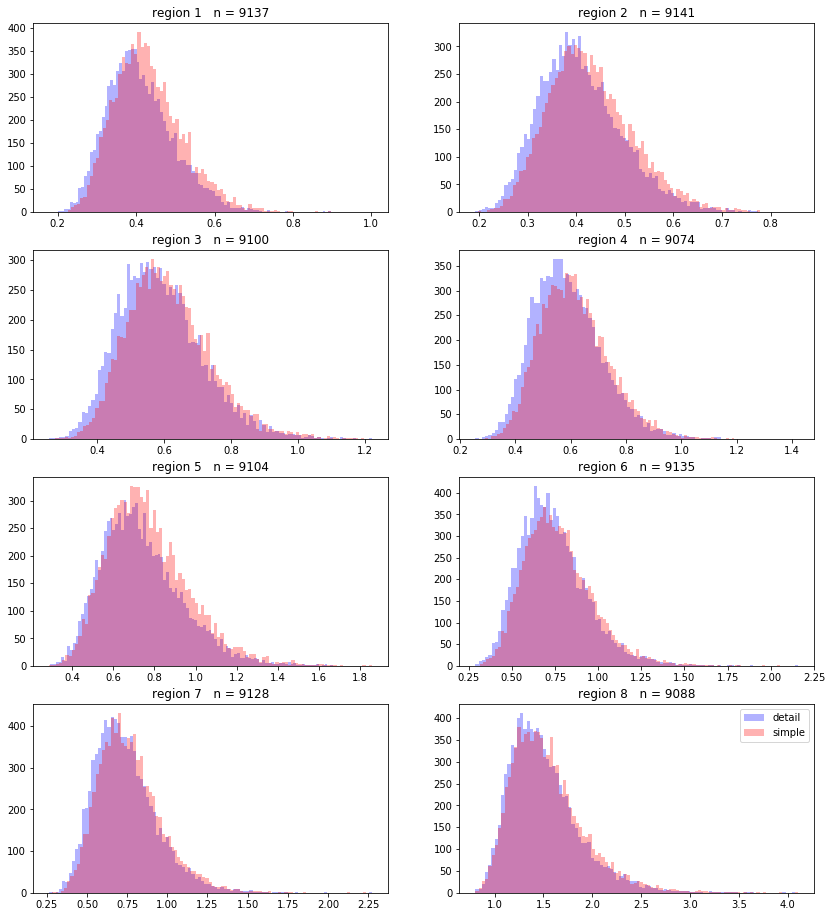

In [84]:
draw_hist_graphs_double(region[a_window/floor_area<0.3], u_a_limit, u_a_s_10_limit, 'detail', 'simple')

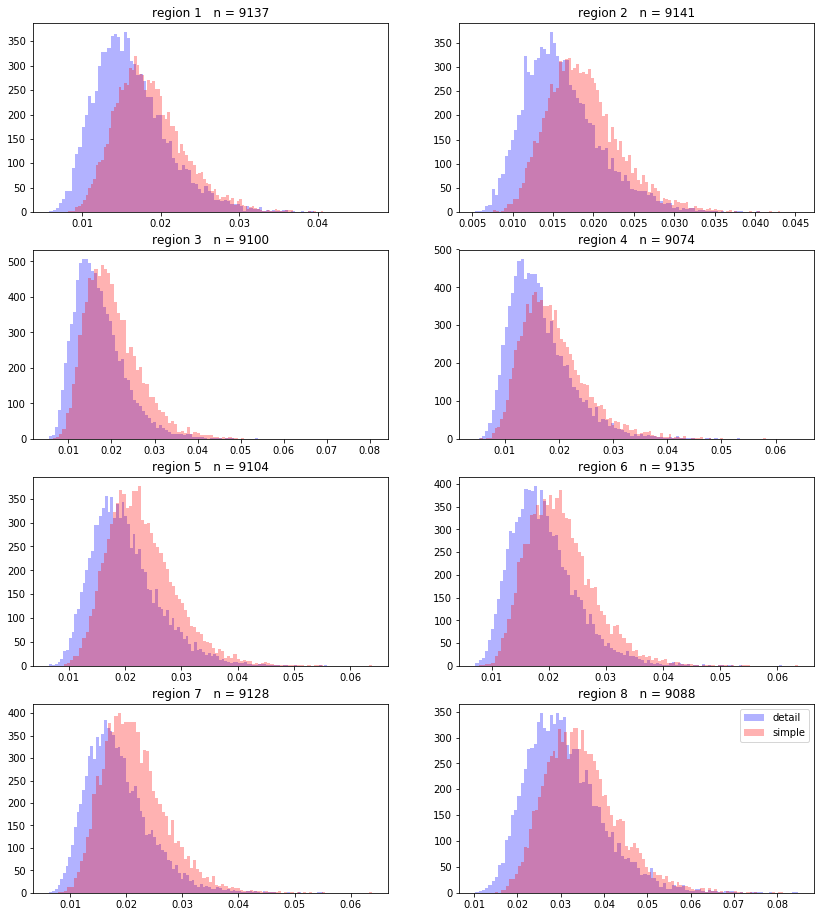

In [85]:
draw_hist_graphs_double(region[a_window/floor_area<0.3], eta_ac_limit, eta_ac_s_10_limit, 'detail', 'simple')

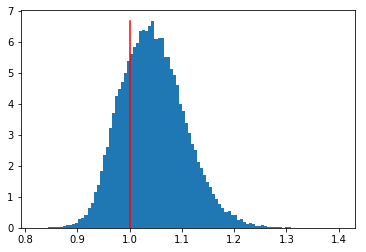

In [86]:
d=plt.hist(r_u_a_10_limit, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

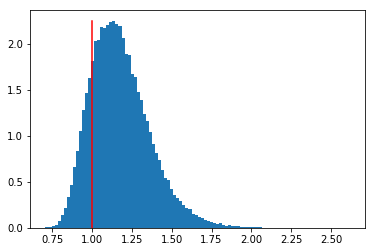

In [87]:
d=plt.hist(r_eta_ac_10_limit, bins=100, density=True)
plt.plot([1.0, 1.0], [0.0, np.max(d[0])], color='r')
plt.show()

In [88]:
np.count_nonzero(r_u_a_10 < 1.0) / np.count_nonzero(r_u_a_10)

0.3118375

In [89]:
np.count_nonzero(r_u_a_10_limit < 1.0) / np.count_nonzero(r_u_a_10_limit)

0.2448873222050009

In [90]:
np.count_nonzero(r_eta_ac_10 < 1.0) / np.count_nonzero(r_eta_ac_10)

0.2397625

In [91]:
np.count_nonzero(r_eta_ac_10_limit < 1.0) / np.count_nonzero(r_eta_ac_10_limit)

0.16802227495302235